In [420]:
# Michael Giles
# COMSC225
# FinalProjCode.ipynb
# Compare the type of college (Private/Not) to the number of applications as well as the number of applications compared to the number of acceptances for each type.
# Prediction: The number of applications to private schools is smaller than the number of applications to non-private schools. 
#             The acceptance ratio for Private schools will be lower than that of Non-private schools. 
#             The number of enrollments is the most likely to be of the most importance
# 2/12/2024

import pandas as pd
df = pd.read_csv("College.csv")
print(df)

X_columns = [2, 3, 4, 9, 10]
X = df.iloc[:, X_columns].values  # Selecting all rows from columns
y = df.iloc[:, 1].values # Selecting all rows from the first column


                         Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28   

     Top25perc  F.Undergrad

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [422]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [423]:
df.dropna()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [424]:
df['Private'].describe() # do for each relevant column

count     777
unique      2
top       Yes
freq      565
Name: Private, dtype: object

In [425]:
df['Accept'].describe() # do for each relevant column

count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64

In [426]:
df['Apps'].describe() # do for each relevant column

count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64

In [427]:
df['Enroll'].describe() # For each relevant column

count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64

In [428]:
df = df.reset_index(drop=True)
display(df)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [429]:
df.dropna()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [430]:
import pandas as pd

# Define a function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Specify columns in your dataset where you want to remove outliers
columns_to_check = ['Accept', 'Room.Board', 'Apps', 'Outstate', 'Enroll'] 

# Apply the function to remove outliers for each specified column
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)

# Display the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers:", df.shape)


Shape of the dataset after removing outliers: (608, 19)


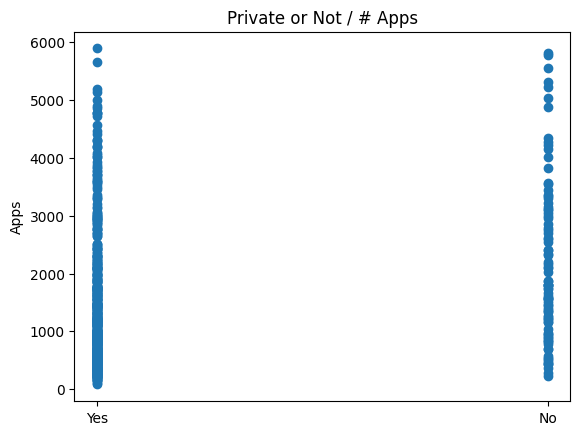

In [431]:
import matplotlib.pyplot as plt

plt.scatter(df.Private, df.Apps)
plt.title("Private or Not / # Apps")
plt.ylabel("Apps")
plt.show()

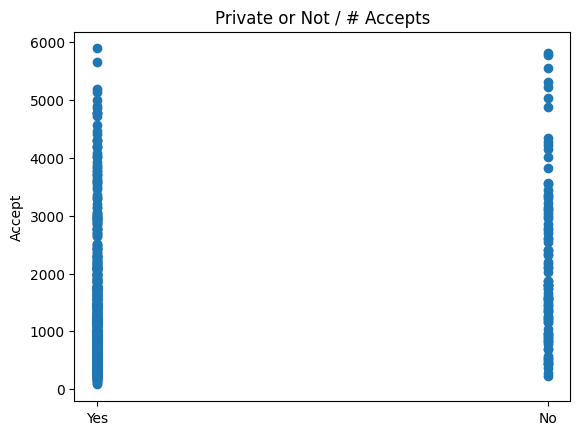

In [432]:
import matplotlib.pyplot as plt

plt.scatter(df.Private, df.Apps)
plt.title("Private or Not / # Accepts")
plt.ylabel("Accept")
plt.show()

In [433]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Selecting specific columns for X and y
X_columns = [2, 3, 4, 9, 10]  # Indices of the columns you want to include in X
y_column = 1  # Index of the column you want to use as y

X = df.iloc[:, X_columns].values
y = df.iloc[:, y_column].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train classifiers and evaluate them with test and train accuracy scores
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train) # Predict on training data
    y_test_pred = clf.predict(X_test) # Predict on test data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    results.append((name, train_accuracy, test_accuracy))

# Print results
for name, train_accuracy, test_accuracy in results:
    print(f'{name}: Train Accuracy: {train_accuracy * 100:.2f}%, Test Accuracy: {test_accuracy * 100:.2f}%')


Random Forest: Train Accuracy: 100.00%, Test Accuracy: 89.59%
Logistic Regression: Train Accuracy: 93.83%, Test Accuracy: 91.23%
KNN: Train Accuracy: 93.83%, Test Accuracy: 88.77%


In [434]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_column is the index of the target column ('Private')
label_encoder = LabelEncoder()
y = df.iloc[:, y_column].values

# Apply label encoding to the target variable y
y = label_encoder.fit_transform(y)

# Check the data type of y to confirm the conversion
print("Data type of y after label encoding:", y.dtype)

Data type of y after label encoding: int64


In [435]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [436]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=5, noise=3, random_state=42)

# Convert regression targets to binary classification targets
median_y = np.median(y)
y_class = (y > median_y).astype(int)  # Binary classification: 0 or 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.4, random_state=42)

# Train a logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)


Accuracy: 0.985


In [437]:
median_y = np.median(y)
y_binary = (y > median_y).astype(int)  # Convert to binary classes based on median

In [438]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Perform 5-fold cross-validation
cv_scores = cross_val_score(LogisticRegression(), X, y_binary, cv=5, scoring='accuracy')

# Print individual cross-validated accuracy scores
print("Cross-validated Accuracy:", cv_scores)

# Calculate and print average cross-validated accuracy score
print("Average Cross-validated Accuracy:", cv_scores.mean())


Cross-validated Accuracy: [0.96 0.99 0.99 0.98 0.98]
Average Cross-validated Accuracy: 0.9800000000000001


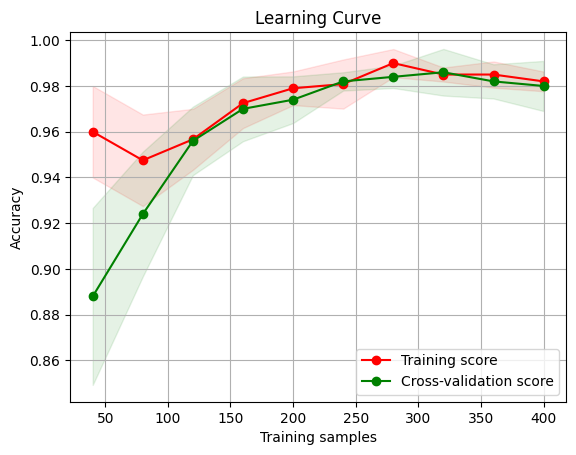

In [441]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=5, noise=3, random_state=42)

# binary classification
median_y = np.median(y)
y_class = (y > median_y).astype(int)  # Binary classification: 0 or 1

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(), X, y_class, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training samples")
plt.ylabel("Accuracy")
plt.grid()

# Plot training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot cross-validation scores
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


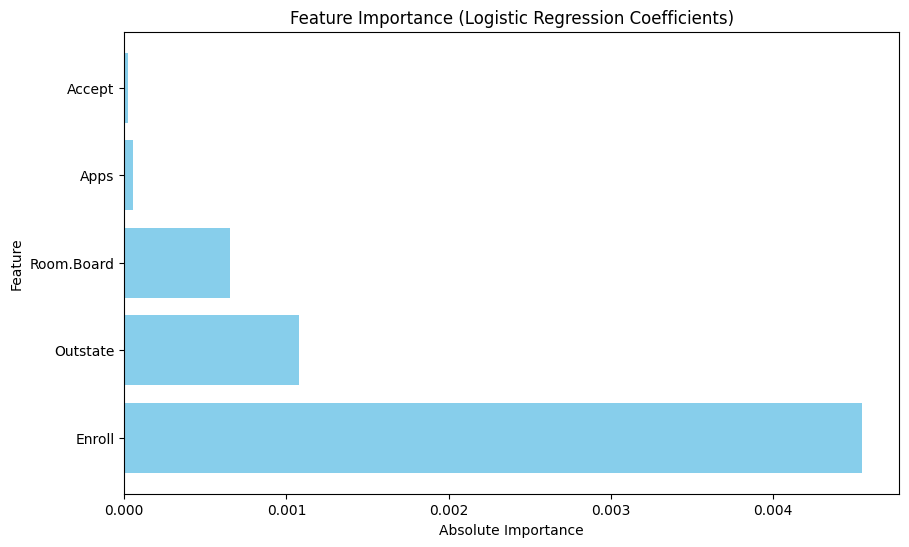

Top Features:
      Feature  AbsImportance
2      Enroll       0.004552
3    Outstate       0.001078
4  Room.Board       0.000651
0        Apps       0.000056
1      Accept       0.000022


In [440]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Define X_columns, y_column, and create X and y
X_columns = [2, 3, 4, 9, 10]  # Indices of the columns to include in X
y_column = 1  # Index of the column to use as y
X = df.iloc[:, X_columns].values
y = df.iloc[:, y_column].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Define and train the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)
logistic_reg.fit(X_train, y_train)

# Get feature coefficients (importances) from the trained model
feature_importances = logistic_reg.coef_[0]

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': df.columns[X_columns], 'Importance': feature_importances})

# Sort the DataFrame by absolute value of importance coefficients
feature_importance_df['AbsImportance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='AbsImportance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['AbsImportance'], color='skyblue')
plt.xlabel('Absolute Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

# Print top features
print("Top Features:")
print(feature_importance_df[['Feature', 'AbsImportance']])
